In [1]:
# Importing needed library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importing datasets: public and schema
result2019 = pd.read_csv("data/2019/survey_results_public.csv")

schema2019 = pd.read_csv("data/2019/survey_results_schema.csv")

In [3]:
# Set pandas to show all the columns
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
result2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [5]:
# Check the distribution of Social Media preference
result2019['SocialMedia'].value_counts()

Reddit                      14374
YouTube                     13830
WhatsApp                    13347
Facebook                    13178
Twitter                     11398
Instagram                    6261
I don't use social media     5554
LinkedIn                     4501
WeChat 微信                     667
Snapchat                      628
VK ВКонта́кте                 603
Weibo 新浪微博                     56
Youku Tudou 优酷                 21
Hello                          19
Name: SocialMedia, dtype: int64

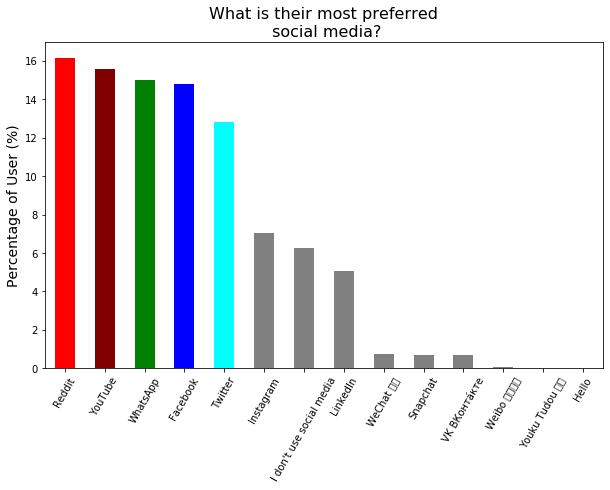

In [57]:
# Plot the social media preferences using bar chart
colors = ['red', 'maroon', 'green', 'blue', 'cyan', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']

ax = (result2019['SocialMedia'].value_counts()/result2019.shape[0]*100).plot(kind='bar', figsize=(10, 6), rot=60, color=colors)

ax.set_title('What is their most preferred\n social media?', fontsize=16)
ax.set_ylabel('Percentage of User (%)', fontsize=14);

In [7]:
# Since the Age1stCode is in object data type, we will turn it into integer

# Check whether it is a digit
age1stCode = result2019[result2019['Age1stCode'].apply(lambda x: str(x).isdigit())]

# Change the data type to int
age1stCode = age1stCode.Age1stCode.values.astype(int)

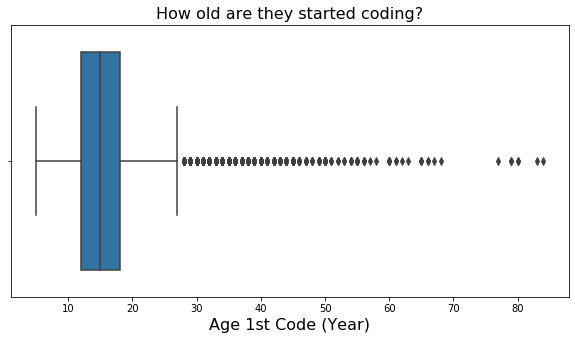

In [43]:
# Boxplot for Age1stCode
plt.figure(figsize=(10, 5))
ax = sns.boxplot(age1stCode)
ax.set_title('How old are they started coding?', fontsize=16)
ax.set_xlabel('Age 1st Code (Year)', fontsize=16);

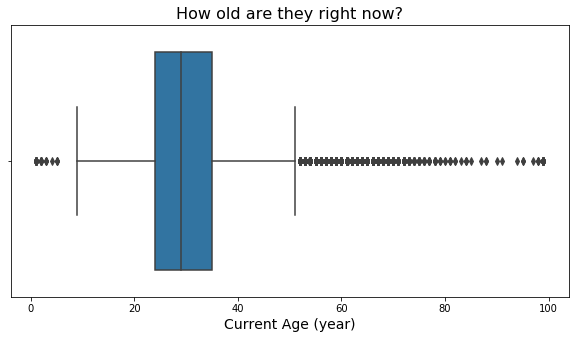

In [45]:
# Plot the user age distribution
plt.figure(figsize=(10, 5))
ax = sns.boxplot(result2019['Age'])
ax.set_title('How old are they right now?', fontsize=16)
ax.set_xlabel('Current Age (year)', fontsize=14);

In [10]:
opensourcer = result2019.OpenSourcer.value_counts()

In [11]:
opensourcer

Never                                                 32295
Less than once per year                               24972
Less than once a month but more than once per year    20561
Once a month or more often                            11055
Name: OpenSourcer, dtype: int64

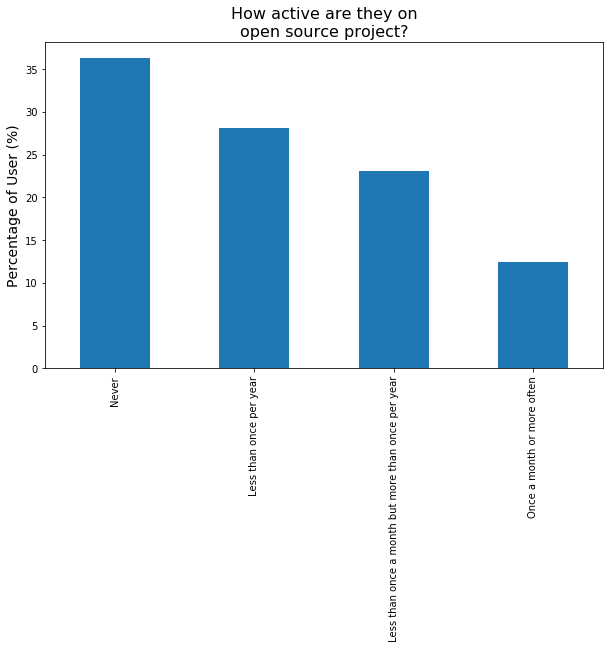

In [55]:
ax = (opensourcer/result2019.shape[0]*100).plot(kind='bar', figsize=(10, 6), rot=90)

ax.set_title('How active are they on\nopen source project?', fontsize=16)
ax.set_ylabel('Percentage of User (%)', fontsize=14);

In [13]:
# Check Education Level distribution
ed_val = result2019['EdLevel'].value_counts()
ed_val

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Some college/university study without earning a degree                                10502
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Associate degree                                                                       2938
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2432
Primary/elementary school                                                              1422
Professional degree (JD, MD, etc.)                                                     1198
I never completed any formal education                                                  553
Name: EdLevel, dtype: int64

In [14]:
edu_keys =  {'Bachelor’s degree (BA, BS, B.Eng., etc.)': 'Bachelor’s degree',
'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 'Master’s degree',
'Some college/university study without earning a degree': "College, didn't graduated",
'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
'Associate degree': 'Associate degree',
'Other doctoral degree (Ph.D, Ed.D., etc.)': 'Doctoral degree',
'Primary/elementary school': 'Primary school',
'Professional degree (JD, MD, etc.)': 'Professional degree',
'I never completed any formal education': 'No formal education'
            }

In [15]:
new_replaced = result2019['EdLevel'].map(edu_keys)

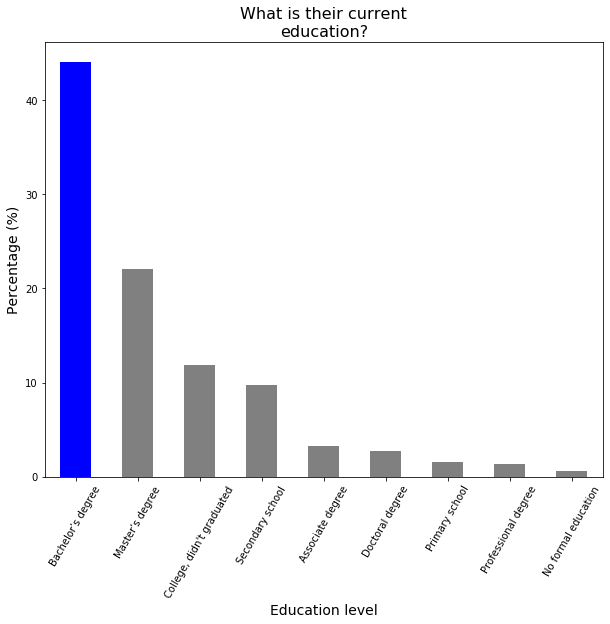

In [54]:
colors = ['blue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']

plt.figure(figsize=(10, 8))
ax = (new_replaced.value_counts()/new_replaced.shape[0]*100).plot(kind='bar', rot=60, color=colors)
ax.set_title('What is their current\neducation?', fontsize=16)
ax.set_ylabel("Percentage (%)", fontsize=14)
ax.set_xlabel("Education level", fontsize=14);

In [18]:
result2019[result2019['WorkWeekHrs']<=100]['WorkWeekHrs'].describe()

count    63984.000000
mean        40.271398
std          9.761038
min          1.000000
25%         40.000000
50%         40.000000
75%         44.000000
max        100.000000
Name: WorkWeekHrs, dtype: float64

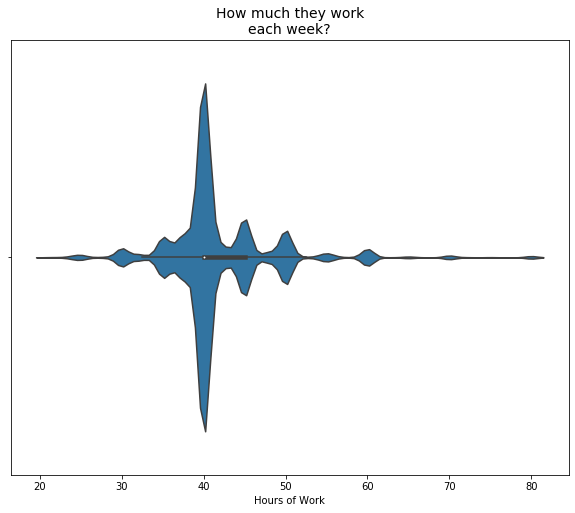

In [51]:
hours_work = result2019[(result2019['WorkWeekHrs']<=80)&(result2019['WorkWeekHrs']>20)]['WorkWeekHrs']

plt.figure(figsize=(10, 8))
ax = sns.violinplot(hours_work)
ax.set_title('How much they work\neach week?', fontsize=14)
ax.set_xlabel('Hours of Work');

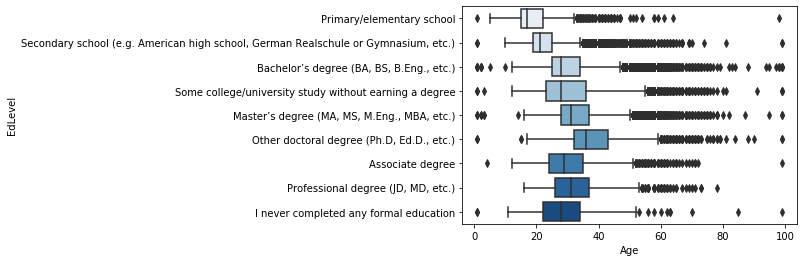

In [47]:
# Use a color palette
ax = sns.boxplot(x=result2019.Age, y = result2019['EdLevel'], palette="Blues")
plt.setp(ax.get_xticklabels(edu_keys.values));

In [32]:
# Check the career satisfaction distribution
result2019.CareerSat.value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

In [33]:
# Check the job satisfaction distribution
result2019.JobSat.value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

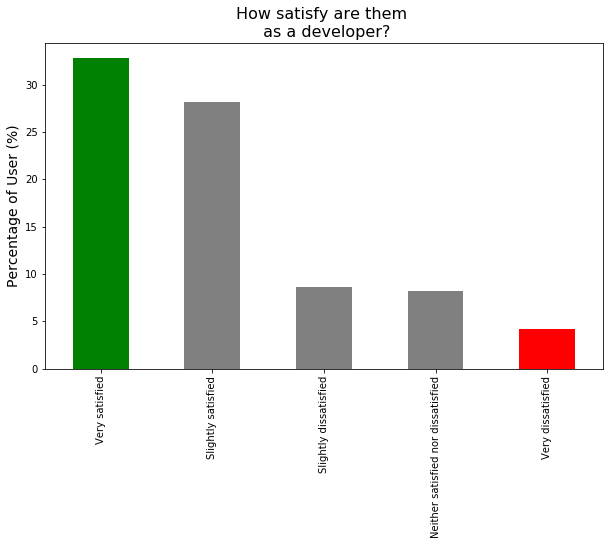

In [52]:
# Plot the career satisfaction using bar chart
colors = ['green', 'grey', 'grey', 'grey', 'red']

ax = (result2019['CareerSat'].value_counts()/result2019.shape[0]*100).plot(kind='bar', figsize=(10, 6), rot=90, color=colors)

ax.set_title('How satisfy are them \n as a developer?', fontsize=16)
ax.set_ylabel('Percentage of User (%)', fontsize=14);

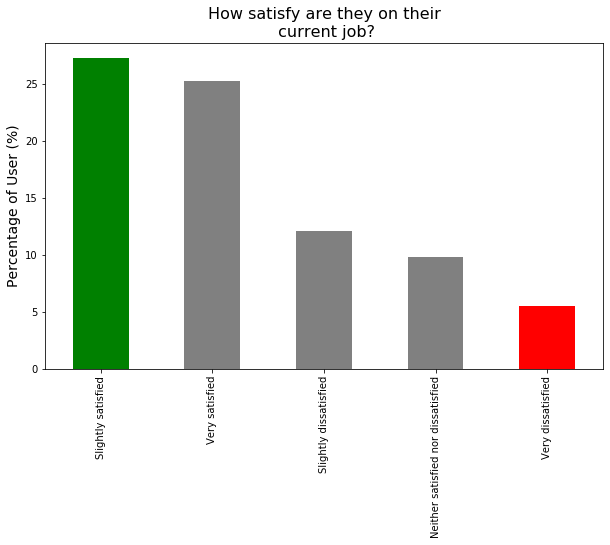

In [53]:
# Plot the job satisfaction using bar chart
colors = ['green', 'grey', 'grey', 'grey', 'red']

ax = (result2019['JobSat'].value_counts()/result2019.shape[0]*100).plot(kind='bar', figsize=(10, 6), rot=90, color=colors)

ax.set_title('How satisfy are they on their\n current job?', fontsize=16)
ax.set_ylabel('Percentage of User (%)', fontsize=14);